## 2-ASSET EFFICIENT FRONTIER (Part II)

In [1]:
# used during development to releoad modules every time there is a change
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
from scipy.stats import norm
from risk_kit import Metrics, pre_processing_ind, plot_ef2
pd.options.display.float_format = '{:.6f}'.format

In [2]:
ind = pre_processing_ind()
ind.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.005600,-0.051900,0.012900,0.029300,0.109700,-0.004800,0.080800,0.017700,0.081400,0.003900,...,0.008300,0.092200,0.020600,0.077000,0.019300,-0.237900,0.000700,0.018700,0.003700,0.052000
1926-08,0.025900,0.270300,0.065000,0.005500,0.100100,-0.035800,-0.025100,0.042500,0.055000,0.081400,...,0.021700,0.020200,0.043900,-0.023800,0.048800,0.053900,-0.007500,-0.001300,0.044600,0.067600
1926-09,0.011600,0.040200,0.012600,0.065800,-0.009900,0.007300,-0.005100,0.006900,0.053300,0.023100,...,0.024100,0.022500,0.001900,-0.055400,0.000500,-0.078700,0.002500,-0.005600,-0.012300,-0.038600
1926-10,-0.030600,-0.033100,0.010600,-0.047600,0.094700,-0.046800,0.001200,-0.005700,-0.047600,0.010000,...,-0.001100,-0.020000,-0.010900,-0.050800,-0.026400,-0.153800,-0.022000,-0.041100,-0.051600,-0.084900
1926-11,0.063500,0.072900,0.045500,0.016600,-0.058000,-0.005400,0.018700,0.054200,0.052000,0.031100,...,0.016300,0.037700,0.036400,0.038400,0.016000,0.046700,0.065200,0.043300,0.022400,0.040000


In [3]:
metrics= Metrics()

In [4]:
ind["1996":"2000"].agg(metrics.annualized_rets)
cov = ind["1996":"2000"].cov()

In [5]:
l = ["Food", "Beer", "Smoke", "Coal"]
asset_to_invest= ind["1996":"2000"][l]
asset_to_invest.head()

,Food,Beer,Smoke,Coal
1996-01,0.034200,0.032600,0.018200,-0.023400
1996-02,0.016200,0.056100,0.031800,0.018200
1996-03,-0.038200,0.019000,-0.076800,0.045300
1996-04,-0.003200,-0.008900,-0.016000,0.006400
1996-05,0.055000,0.096900,0.054800,0.157300


In [6]:
# Calculating vector of of Returns
returns = asset_to_invest.agg(metrics.annualized_rets)
returns

Food    0.116799
Beer    0.141126
Smoke   0.107830
Coal    0.414689
dtype: float64

In [7]:
type(returns)

pandas.core.series.Series

In [8]:
cov.loc[l,l]

,Food,Beer,Smoke,Coal
Food,0.002609,0.002379,0.002061,0.000027
Beer,0.002379,0.005264,0.001359,0.001728
Smoke,0.002061,0.001359,0.008349,-0.000733
Coal,0.000027,0.001728,-0.000733,0.018641


In [9]:
weights= np.repeat(1/4, 4)
weights

array([0.25, 0.25, 0.25, 0.25])

In [10]:
type(weights), type(cov.loc[l,l])

(numpy.ndarray, pandas.core.frame.DataFrame)

In [11]:
metrics.portfolio_return(weights, returns)

0.19511097196038385

In [12]:
metrics.portfolio_vol(weights, cov.loc[l,l])

0.055059195776437045

#### Two Asset Frontier

In [13]:
l = ["Games", "Fin"]
two_asset_portfolio= ind["1996":"2000"][l]
two_asset_portfolio.head()

,Games,Fin
1996-01,0.046900,0.039300
1996-02,0.017900,0.021300
1996-03,0.010800,0.009600
1996-04,0.023700,-0.010800
1996-05,0.027900,0.014100


In [14]:
returns = two_asset_portfolio.agg(metrics.annualized_rets)
returns

Games   0.068212
Fin     0.223371
dtype: float64

In [15]:
n_points = 20
weights = [np.array([w, 1-w]) for  w in np.linspace(0, 1, n_points)]
weights

[array([0., 1.]),
 array([0.05263158, 0.94736842]),
 array([0.10526316, 0.89473684]),
 array([0.15789474, 0.84210526]),
 array([0.21052632, 0.78947368]),
 array([0.26315789, 0.73684211]),
 array([0.31578947, 0.68421053]),
 array([0.36842105, 0.63157895]),
 array([0.42105263, 0.57894737]),
 array([0.47368421, 0.52631579]),
 array([0.52631579, 0.47368421]),
 array([0.57894737, 0.42105263]),
 array([0.63157895, 0.36842105]),
 array([0.68421053, 0.31578947]),
 array([0.73684211, 0.26315789]),
 array([0.78947368, 0.21052632]),
 array([0.84210526, 0.15789474]),
 array([0.89473684, 0.10526316]),
 array([0.94736842, 0.05263158]),
 array([1., 0.])]

In [16]:
rets = [metrics.portfolio_return(w, returns) for w in weights]
vols = [metrics.portfolio_vol(w, cov.loc[l,l]) for w in weights]

In [17]:
#eff_frontier = pd.DataFrame({"R": rets, "Vol": vols})

In [18]:
#eff_frontier.plot.line(x="Vol", y="R", style=".-");

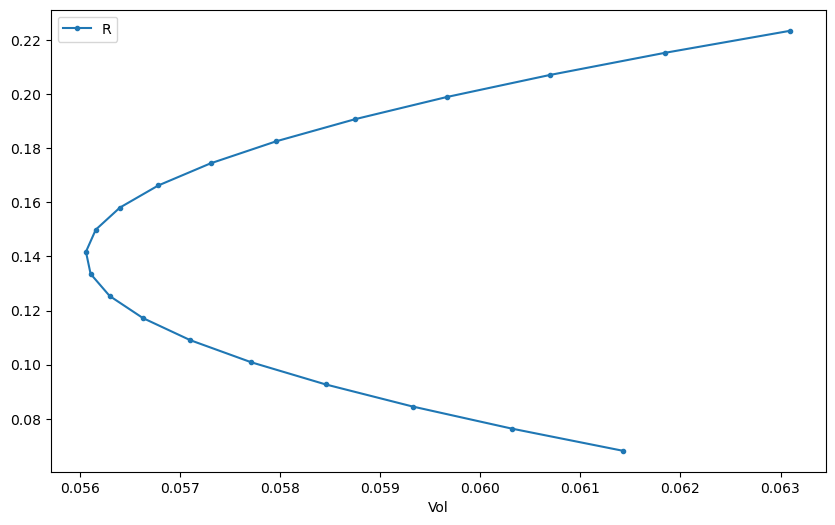

In [19]:
plot_ef2(metrics, 20, returns, cov.loc[l,l])